In [ ]:
import numpy as np #선형대수 관련 함수 이용 가능 모듈
import matplotlib.pyplot as plt#시각화 모듈
import torch #파이토치 기본모듈
import torch.nn as nn #신경망 모델 설계 시 필요한 함수
import torch.nn.functional as F # 자주 이용되는 함수'F'로 설정
from torchvision import transforms, datasets #torchvision모듈 내 transforms, datasets함수 임포트

In [ ]:
#딥러닝 모델 설계 때 필요한 장비 확인
if torch.cuda.is_available():
    DEVICE = torch.device('cuda') #GPU이용
else:
    DEVICE = torch.device('cpu') #GPU이용안되면 CPU이용
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.0.1+cu118  Device: cpu


In [ ]:
BATCH_SIZE = 32 #MLP모델 학습 시 필요한 데이터 개수 단위
EPOCHS = 10 #Mini_Batch 1개 단위로 역전파 이용하여 MLP의 가중값을 업데이트하여 전부 이용하는 횟수

In [ ]:
#데이터 다운로드
train_dataset = datasets.MNIST(root ="../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor( ))
test_dataset = datasets.MNIST(root ="../data/MNIST",
                               train = False,
                               transform = transforms.ToTensor( ))

#데이터셋을 Mini_Batch단위로 분리
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 379257382.00it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 60356598.82it/s]


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 104447569.95it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6490810.48it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [ ]:
#데이터 확인
for (X_train, y_train) in train_loader:
     print('X_train:', X_train.size( ), 'type:', X_train.type( ))
     print('y_train:', y_train.size( ), 'type:', y_train.type( ))

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: t

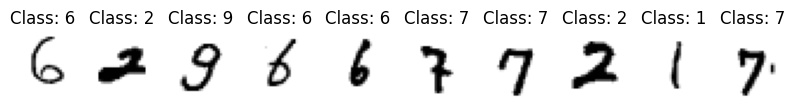

In [ ]:
#시각화
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy( ).reshape(28,28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))